In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
recipes =pd.read_csv('cupcakesvsmuffins.csv')

In [3]:
recipes.head(4)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,50,24,3,7,4,2,0,0
1,Muffin,47,23,12,12,6,2,0,0
2,Muffin,47,26,4,6,9,1,0,0
3,Muffin,55,27,10,8,7,2,0,0


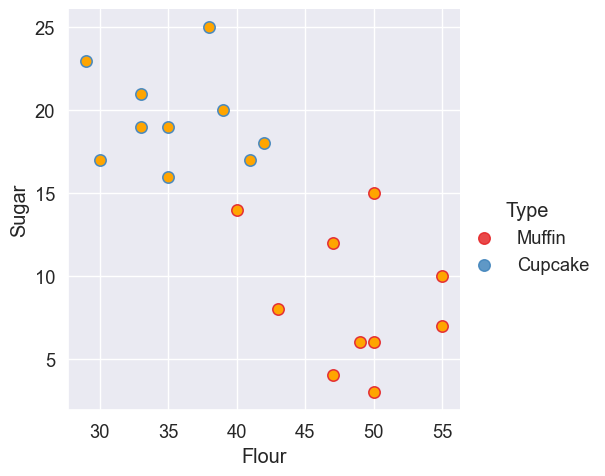

In [4]:
sns.lmplot(x='Flour',y='Sugar',data=recipes, hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.scatter(recipes['Flour'],recipes['Sugar'], color='orange', )

In [5]:
#Format or pre-process the data

In [6]:
type_label =np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
ingredients

array([[50,  3],
       [47, 12],
       [47,  4],
       [55, 10],
       [43,  8],
       [55,  7],
       [50,  6],
       [50, 15],
       [40, 14],
       [49,  6],
       [42, 18],
       [39, 20],
       [30, 17],
       [35, 19],
       [33, 21],
       [35, 16],
       [41, 17],
       [33, 19],
       [38, 25],
       [29, 23]], dtype=int64)

In [7]:
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [8]:
#getting the separating hyperplane
w = model.coef_[0] #Getting the coefs
a = -w[0] / w[1] # Getting the slope
xx = np.linspace(30,60) #Creating the x line randomly
yy = a * xx - (model.intercept_[0]) / w[1] # Making it an equation

# Plotting the parallels through the hyperplane.
b=model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


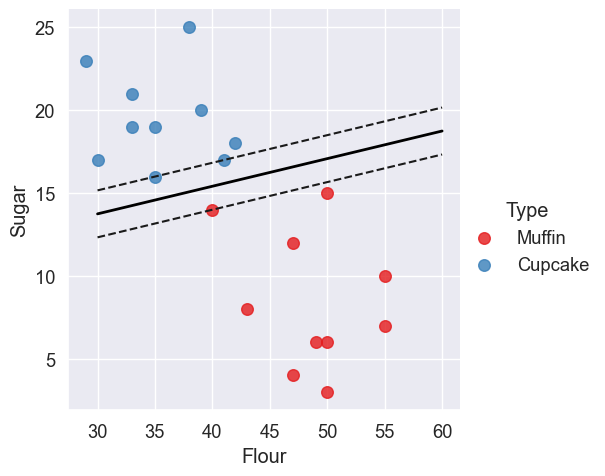

In [9]:
sns.lmplot(x='Flour',y='Sugar',data=recipes, hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [14]:
# Creating a function to do prediction based on recipe
def pred(flour,sugar):
        if (model.predict([[flour,sugar]])) == 0:
            print("You have a muffin")
        else:
            print("You have a cupcake")
            

pred(50,10)

You have a muffin


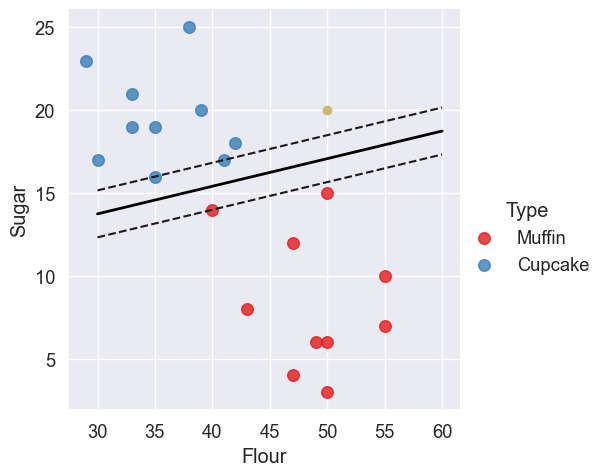

In [16]:
sns.lmplot(x='Flour',y='Sugar',data=recipes, hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.plot(50,20,'yo') #showing the point on the graph